In [21]:
!pip install pmdarima

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from scipy.fft import fft
from scipy import fftpack
from datetime import datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet

In [26]:
!pip install yfinance
import yfinance as yf

In [27]:
ticker = "MSFT"
start_date = "2010-01-01"
end_date = "2023-01-01"
data = yf.download(ticker, start=start_date, end=end_date)
data.to_csv("Microsoft_Stock.csv")
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2010-01-04 00:00:00+00:00,23.347319,30.950001,31.100000,30.590000,30.620001,38409100
2010-01-05 00:00:00+00:00,23.354868,30.959999,31.100000,30.639999,30.850000,49749600
2010-01-06 00:00:00+00:00,23.211540,30.770000,31.080000,30.520000,30.879999,58182400
2010-01-07 00:00:00+00:00,22.970144,30.450001,30.700001,30.190001,30.629999,50559700
2010-01-08 00:00:00+00:00,23.128553,30.660000,30.879999,30.240000,30.280001,51197400


In [28]:
data.shape

(3272, 6)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  3272 non-null   float64
 1   (Close, MSFT)      3272 non-null   float64
 2   (High, MSFT)       3272 non-null   float64
 3   (Low, MSFT)        3272 non-null   float64
 4   (Open, MSFT)       3272 non-null   float64
 5   (Volume, MSFT)     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [30]:
data.describe(include='all')

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,93.978149,100.115355,101.082078,99.050037,100.090715,3.801156e+07
std,88.010072,88.254726,89.200539,87.220896,88.247581,2.147184e+07
min,17.517590,23.010000,23.320000,22.730000,23.090000,7.425600e+06
25%,25.600618,31.815000,32.032500,31.592500,31.807499,2.384465e+07
50%,49.378986,55.740000,56.049999,55.160000,55.680000,3.227825e+07
75%,132.811211,139.070000,140.390003,138.002499,139.607498,4.679112e+07
max,335.105774,343.109985,349.670013,342.200012,344.619995,3.193179e+08


In [31]:
data.isnull().sum()

,,0
Price,Ticker,
Adj Close,MSFT,0
Close,MSFT,0
High,MSFT,0
Low,MSFT,0
Open,MSFT,0
Volume,MSFT,0


In [32]:
data.reset_index(drop = True)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
0,23.347319,30.950001,31.100000,30.590000,30.620001,38409100
1,23.354868,30.959999,31.100000,30.639999,30.850000,49749600
2,23.211540,30.770000,31.080000,30.520000,30.879999,58182400
3,22.970144,30.450001,30.700001,30.190001,30.629999,50559700
4,23.128553,30.660000,30.879999,30.240000,30.280001,51197400
...,...,...,...,...,...,...
3267,235.345581,238.729996,238.869995,233.940002,236.110001,21207000
3268,233.600677,236.960007,238.929993,235.830002,238.699997,16688600
3269,231.205124,234.529999,239.720001,234.169998,236.889999,17457100


In [51]:
# Reset the index to create a numerical index.
data = data.reset_index()

# Plot the data using the index column, which is named 'level_0' or rename it:
# Option 1: Use 'level_0' directly:
fig = px.line(data, x='level_0', y=['Close', 'Open', 'High', 'Adj Close'],
              labels={'value': 'Price', 'variable': 'Stock Metric'},
              title='Stock Prices over Time')
fig.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (3272, 1) instead

In [46]:
for col in data.columns[1:]:
  print(f'Checking stationary of {col} column')
  adf = adfuller(data[col])
  print(f'ADF Statistic: {adf[0]}')
  print(f'p-value: {adf[1]}')
  if adf[1] < 0.5:
    print(f"The '{col}' column series is stationary")
  else:
    print(f"The '{col}' column series is not stationary")
  print('-'*100)

Checking stationary of ('Date', '') column
ADF Statistic: 3.4087007628337784
p-value: 1.0
The '('Date', '')' column series is not stationary
----------------------------------------------------------------------------------------------------
Checking stationary of ('Adj Close', 'MSFT') column
ADF Statistic: 0.25634328093479497
p-value: 0.9752504571827391
The '('Adj Close', 'MSFT')' column series is not stationary
----------------------------------------------------------------------------------------------------
Checking stationary of ('Close', 'MSFT') column
ADF Statistic: 0.17625023291888514
p-value: 0.9708976378738849
The '('Close', 'MSFT')' column series is not stationary
----------------------------------------------------------------------------------------------------
Checking stationary of ('High', 'MSFT') column
ADF Statistic: 0.1613427365448897
p-value: 0.970008149943884
The '('High', 'MSFT')' column series is not stationary
---------------------------------------------------

Time period for '('Date', '')' column series
Detected peak frequency: 0.0003 cycles per day
Estimated period: 3272.00 days
Time period in data set: 3272 days


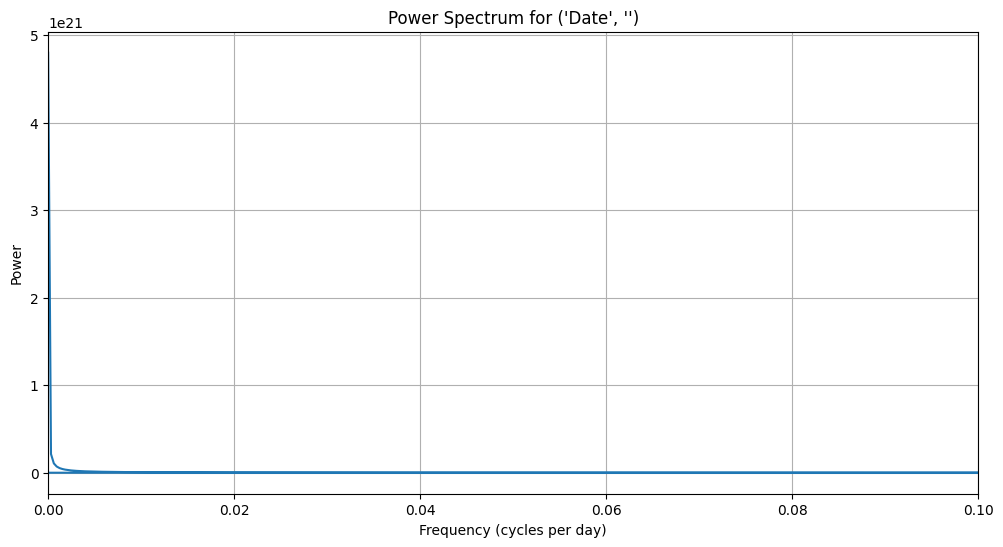

----------------------------------------------------------------------------------------------------
Time period for '('Adj Close', 'MSFT')' column series
Detected peak frequency: 0.0003 cycles per day
Estimated period: 3272.00 days
Time period in data set: 3272 days


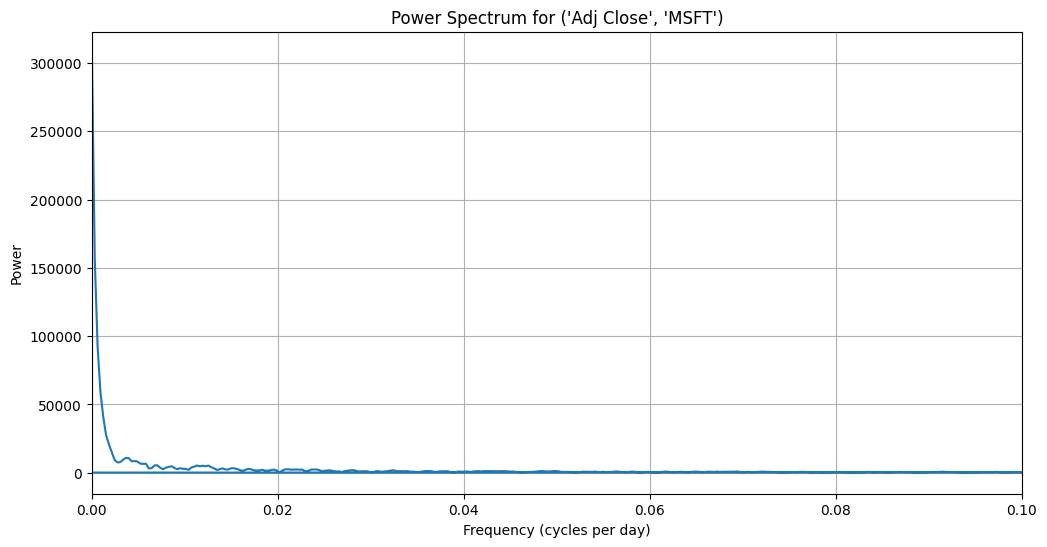

----------------------------------------------------------------------------------------------------
Time period for '('Close', 'MSFT')' column series
Detected peak frequency: 0.0003 cycles per day
Estimated period: 3272.00 days
Time period in data set: 3272 days


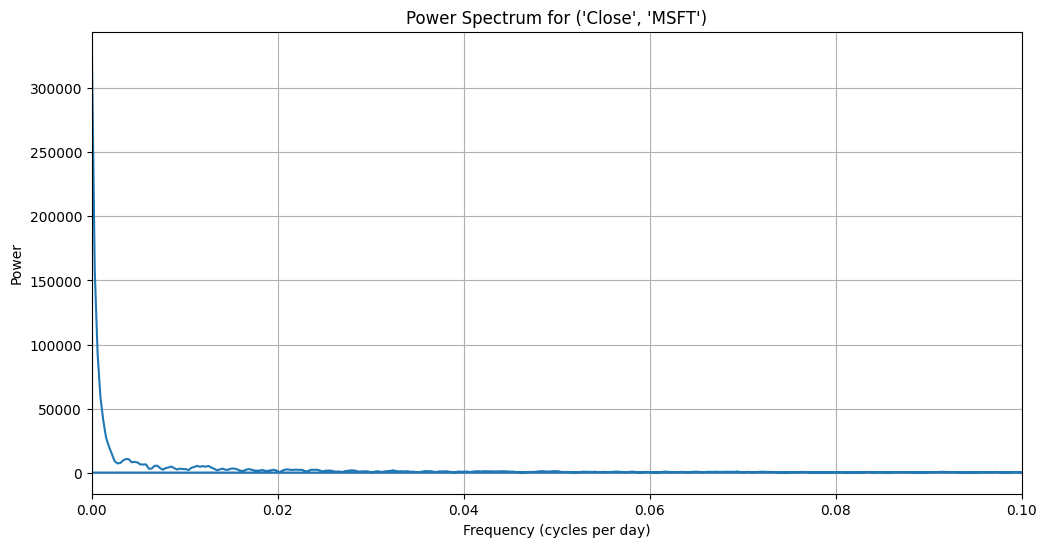

----------------------------------------------------------------------------------------------------
Time period for '('High', 'MSFT')' column series
Detected peak frequency: 0.0003 cycles per day
Estimated period: 3272.00 days
Time period in data set: 3272 days


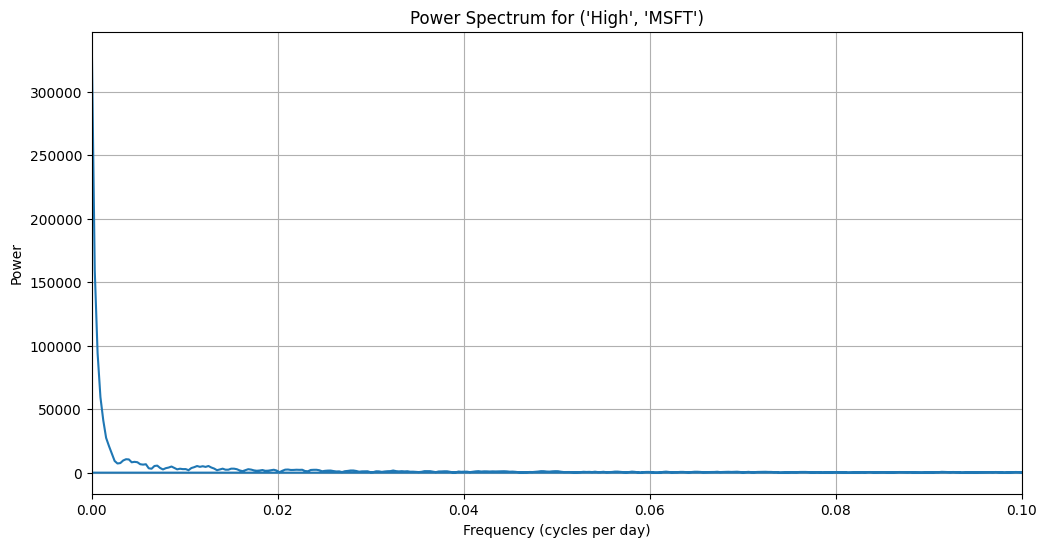

----------------------------------------------------------------------------------------------------
Time period for '('Low', 'MSFT')' column series
Detected peak frequency: 0.0003 cycles per day
Estimated period: 3272.00 days
Time period in data set: 3272 days


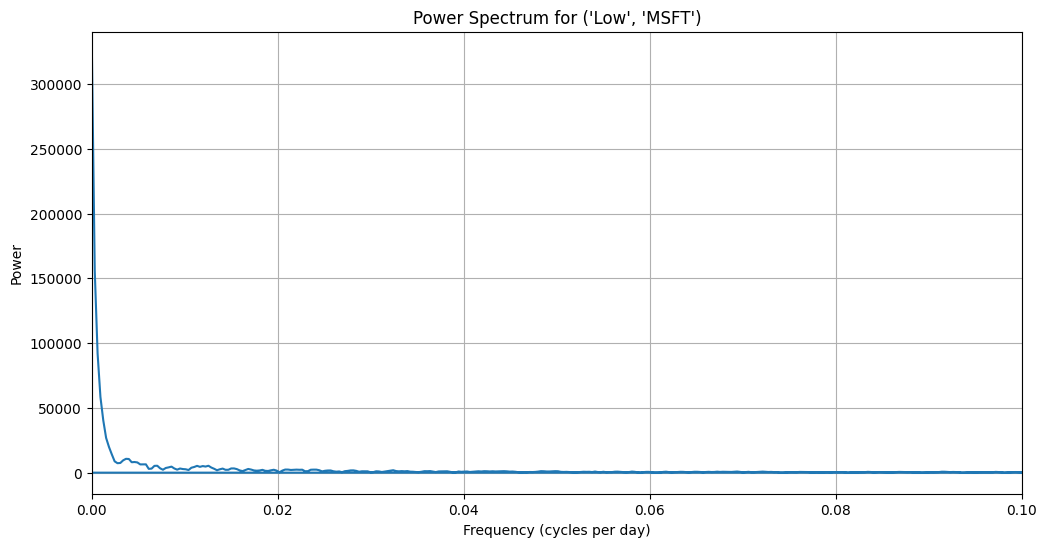

----------------------------------------------------------------------------------------------------
Time period for '('Open', 'MSFT')' column series
Detected peak frequency: 0.0003 cycles per day
Estimated period: 3272.00 days
Time period in data set: 3272 days


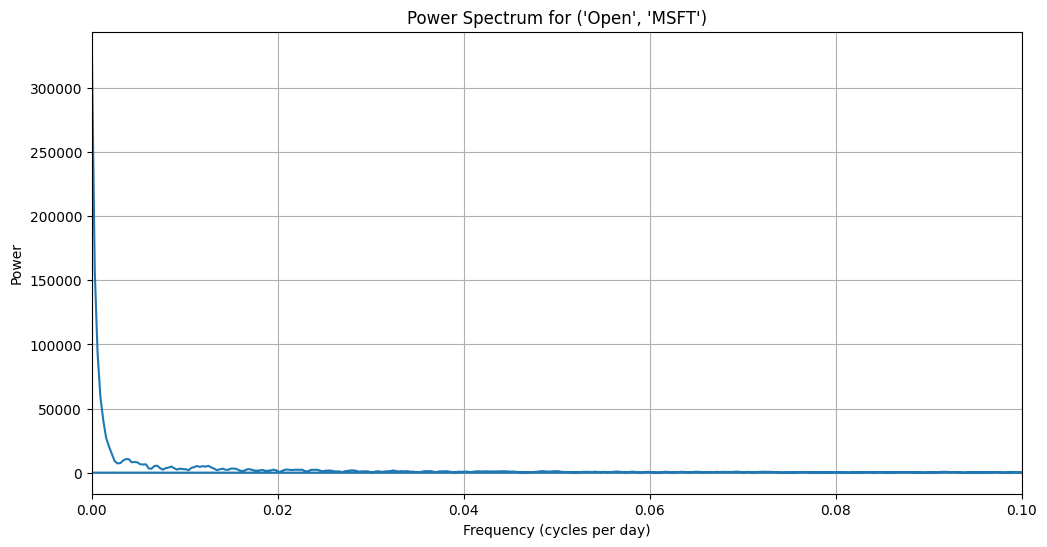

----------------------------------------------------------------------------------------------------
Time period for '('Volume', 'MSFT')' column series
Detected peak frequency: 0.0003 cycles per day
Estimated period: 3272.00 days
Time period in data set: 3272 days


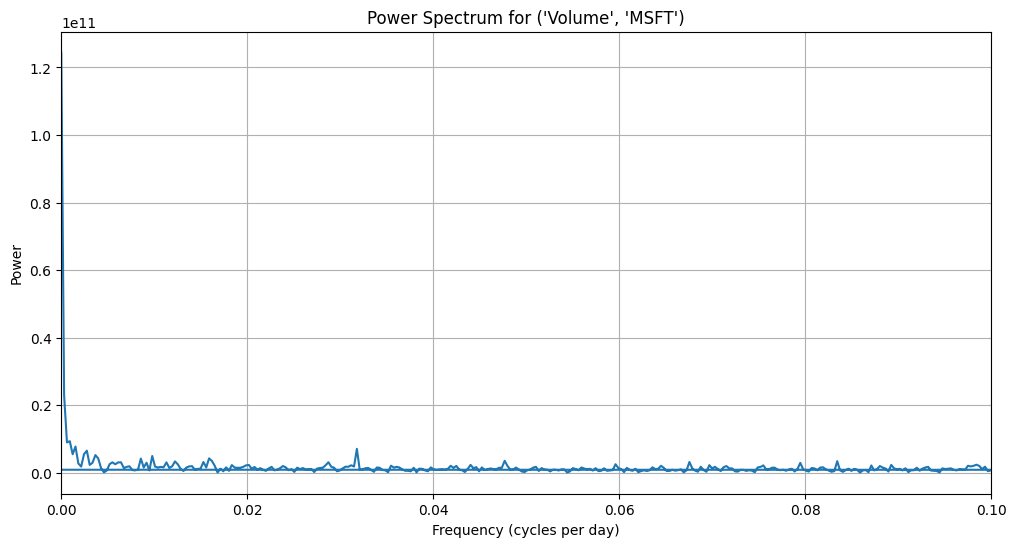

----------------------------------------------------------------------------------------------------
Time period for '('Index', '')' column series
Detected peak frequency: 0.0003 cycles per day
Estimated period: 3272.00 days
Time period in data set: 3272 days


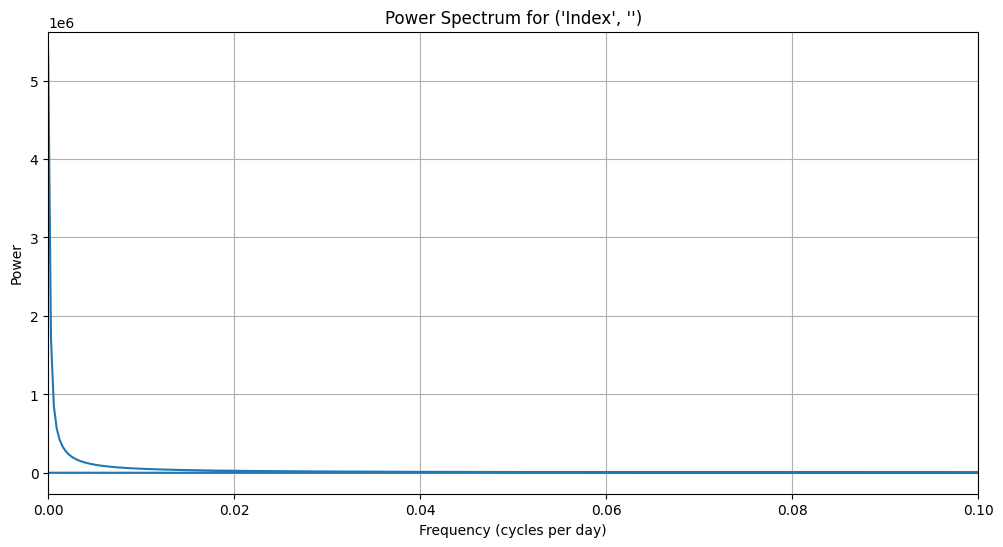

----------------------------------------------------------------------------------------------------


In [50]:
for col in data.columns[1:]:
  # Fourier Transformation
  values = data[col].dropna().values  # Extract values as a NumPy array
  open_fft = fft(values.astype(float)) # Convert to float64

  # Power of each frequency
  power = np.abs(open_fft)
  frequencies = fftpack.fftfreq(len(data[col].dropna())) # Frequency array

  # Peak frequency (ignoring the zero frequency component)
  peak_frequency = frequencies[np.argmax(power[1:]) + 1]

  # Convert peak frequency to time period
  time_period = 1 / peak_frequency

  # Print results
  print(f"Time period for '{col}' column series")
  print(f"Detected peak frequency: {peak_frequency:.4f} cycles per day")
  print(f"Estimated period: {time_period:.2f} days")
  print(f'Time period in data set: {len(data)} days')

  # visualize the power spectrum
  plt.figure(figsize=(12, 6))
  plt.plot(frequencies, power)
  plt.title(f'Power Spectrum for {col}')
  plt.xlabel('Frequency (cycles per day)')
  plt.ylabel('Power')
  plt.xlim(0, 0.1)
  plt.grid()
  plt.show()
  print('-'*100)